<a href="https://colab.research.google.com/github/drishtiiii/Brain-Tumor-Detection-Using-VGG19-and-Resnet50/blob/main/brain_tumor_detection_using_vgg19_and_resnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import zipfile
import os

zip_ref = zipfile.ZipFile('/content/drive/MyDrive/archive_31.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Mounted at /content/drive


In [2]:
import os
from cv2 import imread
import matplotlib.pyplot as plt

import keras
from keras.layers import Flatten, Dense, Dropout
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import ResNet50, VGG19

import warnings
warnings.filterwarnings("ignore")

In [4]:
path = "/content/archive_3"

train_generator = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=2, 
    vertical_flip=2)
image_generator = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=2, 
    vertical_flip=2, 
    validation_split=0.5)    
dir1='/content/archive_3/train'
training_set = train_generator.flow_from_directory(batch_size=16,
                                                 directory=dir1,
                                                 shuffle=True,
                                                 target_size=(224,224), 
                                                 subset="training",
                                                 color_mode='rgb',
                                                 class_mode='binary')

dir2='/content/archive_3/validation'
validation_set = image_generator.flow_from_directory(batch_size=16,
                                                 directory=dir2,
                                                 shuffle=True,
                                                 target_size=(224,224), 
                                                 subset="validation",
                                                 color_mode='rgb',
                                                 class_mode='binary')

Found 1792 images belonging to 2 classes.
Found 604 images belonging to 2 classes.


<h4>Tumour MRI Image</h4>

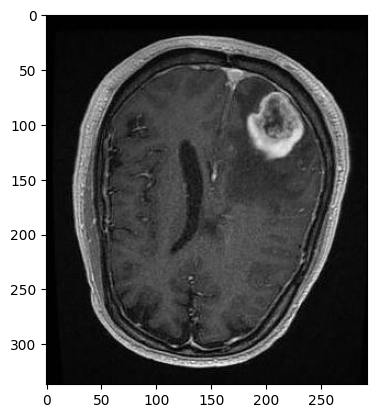

In [5]:
yes_path = dir1+"/yes/"+os.listdir(dir1+"/yes/")[4]
tumour = imread(yes_path)
plt.imshow(tumour)

<h4>Normal MRI Image</h4>

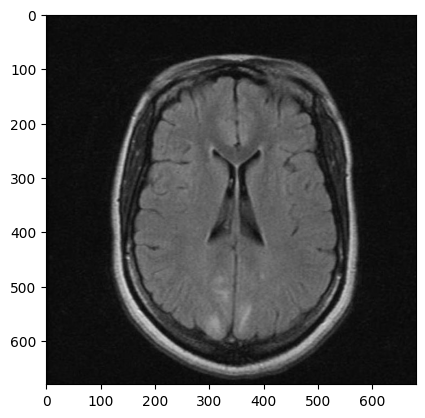

In [6]:
no_path = dir2+"/no/"+os.listdir(dir2+"/no/")[4]
tumour = imread(no_path)
plt.imshow(tumour)

In [7]:
training_set.class_indices

{'no': 0, 'yes': 1}

<h3>VGG 19</h3>

In [8]:
model = VGG19(
      input_shape = (224,224,3),
      include_top = False,
      
    )


80134624/80134624 [==============================] - 0s 0us/step


In [9]:
for layers in model.layers:
    layers.trainable = False

In [10]:
x = Flatten()(model.output)
x = Dropout(0.4)(x)

x = Dense(256, activation='relu')(x)
x = Dense(1, activation = "sigmoid")(x)


# Create the new model

model = keras.Model(model.input, x)
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = "accuracy")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [11]:
hist = model.fit_generator(training_set,validation_data = validation_set, epochs = 70)

Epoch 1/70
112/112 [==============================] - 28s 133ms/step - loss: 0.6006 - accuracy: 0.8203 - val_loss: 0.1740 - val_accuracy: 0.9371
Epoch 2/70
112/112 [==============================] - 12s 105ms/step - loss: 0.1856 - accuracy: 0.9224 - val_loss: 0.1515 - val_accuracy: 0.9421
Epoch 3/70
112/112 [==============================] - 14s 121ms/step - loss: 0.1128 - accuracy: 0.9615 - val_loss: 0.1047 - val_accuracy: 0.9570
Epoch 4/70
112/112 [==============================] - 12s 110ms/step - loss: 0.0787 - accuracy: 0.9688 - val_loss: 0.0507 - val_accuracy: 0.9868
Epoch 5/70
112/112 [==============================] - 12s 111ms/step - loss: 0.1112 - accuracy: 0.9581 - val_loss: 0.1236 - val_accuracy: 0.9520
Epoch 6/70
112/112 [==============================] - 13s 112ms/step - loss: 0.0762 - accuracy: 0.9771 - val_loss: 0.1449 - val_accuracy: 0.9454
Epoch 7/70
112/112 [==============================] - 13s 112ms/step - loss: 0.0923 - accuracy: 0.9671 - val_loss: 0.0319 - val_ac

In [12]:
hist = hist.history

In [13]:
model.evaluate(validation_set )

38/38 [==============================] - 3s 86ms/step - loss: 0.0229 - accuracy: 0.9934


[0.022944796830415726, 0.9933775067329407]

Text(0, 0.5, 'accuracy')

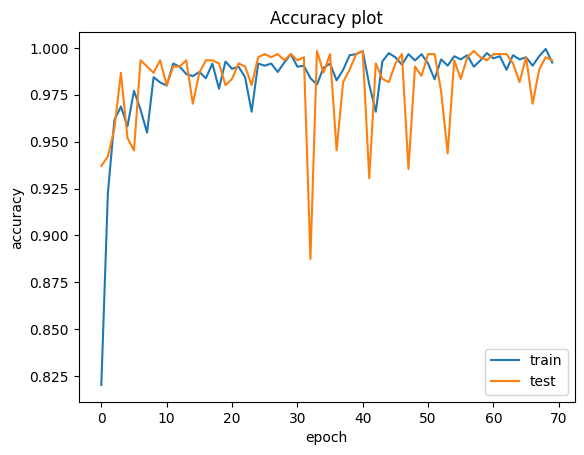

In [14]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

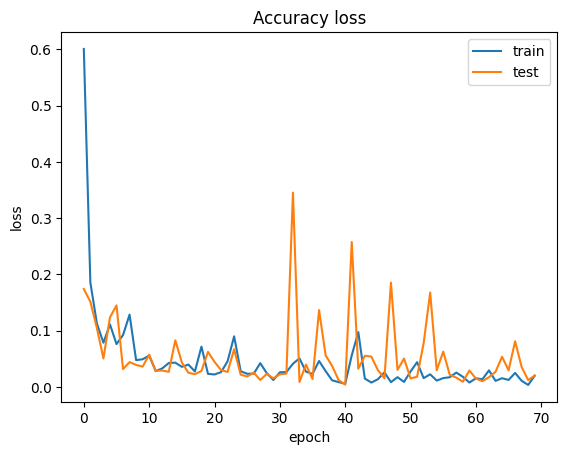

In [15]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")

In [17]:
import numpy as np

In [46]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.5)

test_data = datagen.flow_from_directory(
    dir2,
    target_size=(224, 224),
    batch_size= 32,
    shuffle=True,
    class_mode='binary',
    subset='validation')


# Get the true labels for the test data
true_labels = test_data.classes

# Get the predicted labels for the test data
predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)


Found 604 images belonging to 2 classes.
19/19 [==============================] - 10s 547ms/step


In [47]:
 #Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data)

# Print the results
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

19/19 [==============================] - 9s 480ms/step - loss: 3.0239 - accuracy: 0.5414
Test Loss: 3.0238583087921143
Test Accuracy: 0.5413907170295715


1/1 [==============================] - 0s 34ms/step


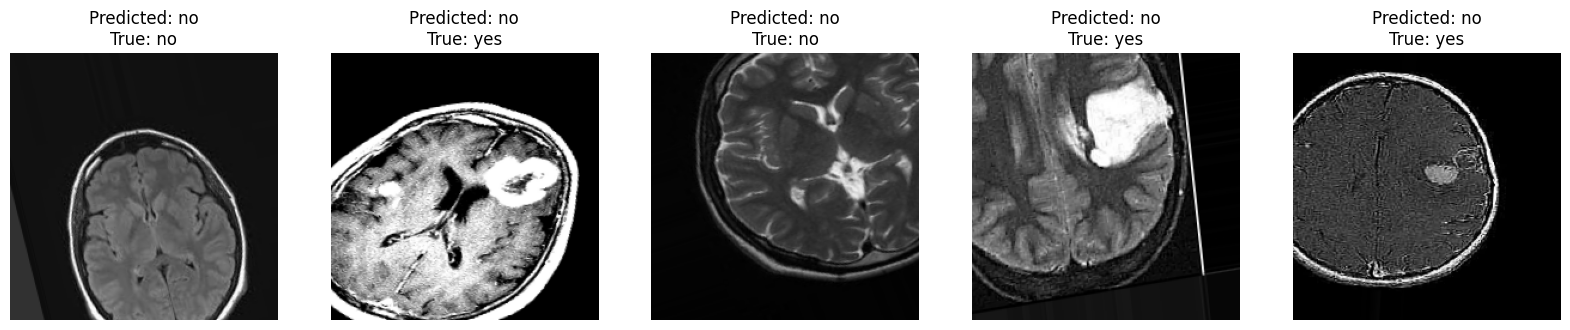

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Get a few images from the test set
# Get a few images and labels from the test set
num_images = 5
test_data_batch = next(test_data)
test_images = test_data_batch[0]
test_labels = test_data_batch[1]

# Make predictions on the test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels to class names
class_names = list(test_data.class_indices.keys())
true_labels = np.squeeze(test_labels).astype(int)
true_class_names = [class_names[label] for label in true_labels]
predicted_class_names = [class_names[label] for label in predicted_labels]

# Plot the images with their predicted and true labels
fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(test_images[i])
    ax.axis('off')
    ax.set_title(f"Predicted: {predicted_class_names[i]}\nTrue: {true_class_names[i]}")

plt.show()


In [53]:
# Generate the classification report
from sklearn.metrics import classification_report

print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77        20
           1       0.00      0.00      0.00        12

    accuracy                           0.62        32
   macro avg       0.31      0.50      0.38        32
weighted avg       0.39      0.62      0.48        32



In [54]:
# Generate the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[20  0]
 [12  0]]


In [37]:
model.save('/content/archive_3/VGG19withCustomlayer.h5')



<h3>ResNet 50</h3>

In [24]:
model = ResNet50(
      input_shape = (224,224,3),
      include_top = False,
    )


94765736/94765736 [==============================] - 0s 0us/step


In [25]:
for layers in model.layers:
    layers.trainable = False

In [26]:
x = Flatten()(model.output)
x = Dropout(0.4)(x)
x = Dense(1, activation = "sigmoid")(x)

model = keras.Model(model.input, x)
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = "accuracy")
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [27]:
hist = model.fit_generator(training_set,validation_data = validation_set, epochs = 70)

Epoch 1/70
112/112 [==============================] - 16s 111ms/step - loss: 0.7117 - accuracy: 0.7210 - val_loss: 0.5407 - val_accuracy: 0.7666
Epoch 2/70
112/112 [==============================] - 11s 98ms/step - loss: 0.6287 - accuracy: 0.7483 - val_loss: 0.5726 - val_accuracy: 0.7848
Epoch 3/70
112/112 [==============================] - 10s 91ms/step - loss: 0.6296 - accuracy: 0.7667 - val_loss: 1.3821 - val_accuracy: 0.6457
Epoch 4/70
112/112 [==============================] - 11s 95ms/step - loss: 0.4680 - accuracy: 0.8181 - val_loss: 0.3467 - val_accuracy: 0.8427
Epoch 5/70
112/112 [==============================] - 11s 99ms/step - loss: 0.4470 - accuracy: 0.8097 - val_loss: 0.5527 - val_accuracy: 0.7964
Epoch 6/70
112/112 [==============================] - 13s 114ms/step - loss: 0.4284 - accuracy: 0.8304 - val_loss: 0.4654 - val_accuracy: 0.8096
Epoch 7/70
112/112 [==============================] - 13s 113ms/step - loss: 0.5707 - accuracy: 0.8131 - val_loss: 0.4317 - val_accura

In [28]:
model.evaluate(validation_set )

38/38 [==============================] - 3s 84ms/step - loss: 0.7407 - accuracy: 0.8046


[0.7406927943229675, 0.804635763168335]

In [29]:
hist = hist.history

Text(0, 0.5, 'accuracy')

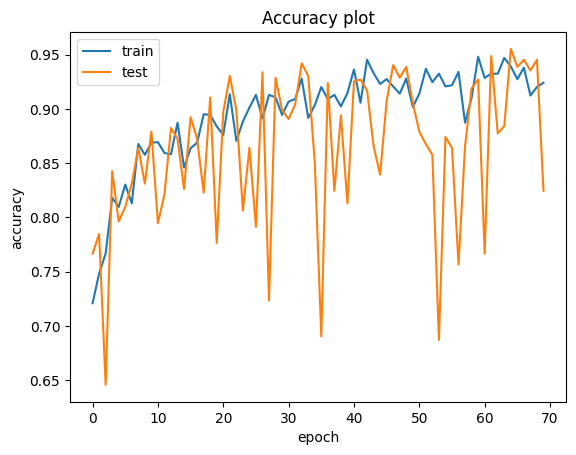

In [30]:
plt.plot(hist["accuracy"])
plt.plot(hist["val_accuracy"])
plt.title("Accuracy plot")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("accuracy")

Text(0, 0.5, 'loss')

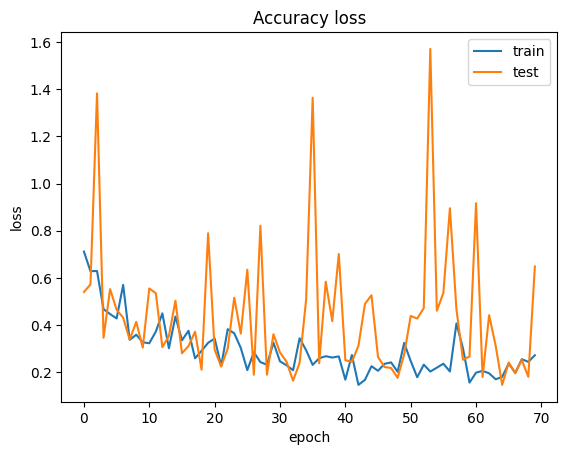

In [31]:
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.title("Accuracy loss")
plt.legend(["train","test"])
plt.xlabel("epoch")
plt.ylabel("loss")

In [32]:
import numpy as np

In [33]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.3)

test_data = datagen.flow_from_directory(
    dir2,
    target_size=(224, 224),
    batch_size= 32,
    shuffle=True,
    class_mode='binary',
    subset='validation')


# Get the true labels for the test data
true_labels = test_data.classes

# Get the predicted labels for the test data
predicted_labels = model.predict(test_data)
predicted_labels = np.argmax(predicted_labels, axis=1)


Found 361 images belonging to 2 classes.
12/12 [==============================] - 8s 412ms/step


In [34]:
 #Evaluate the model on the test set
loss, accuracy = model.evaluate(test_data)

# Print the results
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

12/12 [==============================] - 6s 508ms/step - loss: 3.0357 - accuracy: 0.5596
Test Loss: 3.035723924636841
Test Accuracy: 0.559556782245636


1/1 [==============================] - 0s 37ms/step


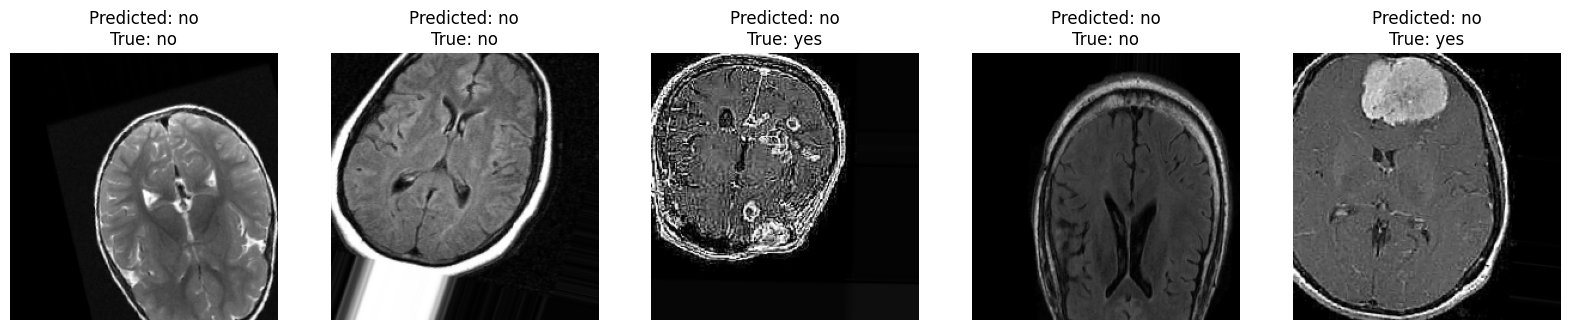

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Get a few images from the test set
# Get a few images and labels from the test set
num_images = 5
test_data_batch = next(test_data)
test_images = test_data_batch[0]
test_labels = test_data_batch[1]

# Make predictions on the test images
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

# Convert one-hot encoded labels to class names
class_names = list(test_data.class_indices.keys())
true_labels = np.squeeze(test_labels).astype(int)
true_class_names = [class_names[label] for label in true_labels]
predicted_class_names = [class_names[label] for label in predicted_labels]

# Plot the images with their predicted and true labels
fig, axes = plt.subplots(1, num_images, figsize=(20, 5))

for i, ax in enumerate(axes):
    ax.imshow(test_images[i])
    ax.axis('off')
    ax.set_title(f"Predicted: {predicted_class_names[i]}\nTrue: {true_class_names[i]}")

plt.show()


In [44]:
# Generate the classification report
from sklearn.metrics import classification_report

print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.56      1.00      0.72        18
           1       0.00      0.00      0.00        14

    accuracy                           0.56        32
   macro avg       0.28      0.50      0.36        32
weighted avg       0.32      0.56      0.40        32



In [45]:
# Generate the confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[18  0]
 [14  0]]


In [36]:
model.save('/content/archive_3/ResNetwithCustomlayer.h5')

